[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]

get_time(Z:/roms/Apps/OB500_fennelP/NL10_copy/ob500_sta.nc, which=ends, tunit=seconds since 1968-05-23 09:00:00 GMT, name=ocean_time)
2012-01-01 00:00:00 0
2012-07-05 12:00:00 373

2012-06-01 12:00:00 305


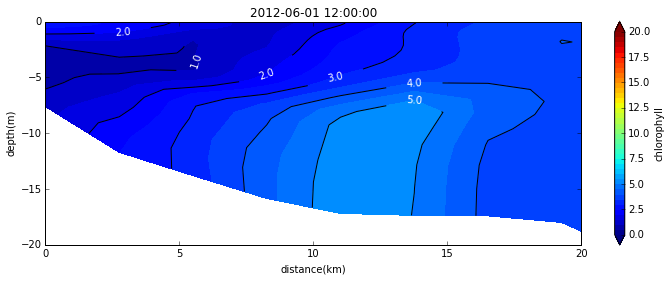

In [128]:
%matplotlib inline

# vview (c) 2015 Teruhisa Okada

import netCDF4
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import datetime
import pandas as pd
from geopy.distance import vincenty

def vview(stafile, stations, vname, time):
    stations = np.asarray(stations)
    
    nc = netCDF4.Dataset(stafile, 'r')
    if type(time) == int:
        t = time
        time = netCDF4.num2date(nc.variables['ocean_time'][t], romspy.JST)
    elif type(time) == datetime.datetime:
        time2 = netCDF4.date2num(time, romspy.JST)
        time3 = nc.variables['ocean_time'][:]
        t = np.where(time3==time2)[0][0]
    else:
        print 'ERROR: your time type =',type(time)
    print '\n',time, t
        
    cs_r = nc.variables['Cs_r'][:]
    h = nc.variables['h'][stations]
    zeta = nc.variables['zeta'][t,stations]
    lon = nc.variables['lon_rho'][stations]
    lat = nc.variables['lat_rho'][stations]
    var = nc.variables[vname][t,stations,:]
    
    depth = np.zeros([len(stations),len(cs_r)])
    dist = np.zeros([len(stations),len(cs_r)])
    for s in range(len(stations)):
        depth[s,:] = (h[s] + zeta[s]) * cs_r[:]
        if s == 0:
            dist[s,:] = 0
        else:
            back = [lon[s-1],lat[s-1]]
            fore = [lon[s],lat[s]]
            dist[s,:] = dist[s-1,:] + vincenty(back, fore).meters

    fig, ax = plt.subplots(figsize=[12,4])
    if vname == 'temp': 
        cflevels=np.arange(7,30.1,1.0)
        clevels=cflevels
    if vname == 'salt': 
        cflevels=np.arange(23,32.2,0.2)
        clevels=np.arange(23,32.2,1.0)
    if vname == 'chlorophyll': 
        cflevels=np.arange(0,20.5,0.5)
        clevels=np.arange(0,21,1.0)
    origin = 'upper'
    #origin = 'lower'
    CF = plt.contourf(dist/1000, depth, var, levels=cflevels, extend='both', origin=origin)
    C = plt.contour(dist/1000, depth, var, colors='k', levels=clevels, origin=origin)
    plt.clabel(C, fmt = '%2.1f', colors = 'w')
    #plt.pcolor(dist, depth, var) 　　　　　　　　　　# グリッド状がいいなら
    CB = plt.colorbar(CF)
    CB.ax.set_ylabel(vname)
    
    plt.xlim(0,20)
    plt.ylim(-20,0)
    
    plt.xlabel('distance(km)')
    plt.ylabel('depth(m)')
    plt.title(datetime.datetime.strftime(time, '%Y-%m-%d %H:%M:%S'))

# station file
stafile = 'Z:/roms/Apps/OB500_fennelP/NL10_copy/ob500_sta.nc'

# プロットする点
stations = [13+i for i in range(20)] # 14 - 33番目
print stations

# タイムステップの確認
import romspy
romspy.get_time(stafile)

time = datetime.datetime(2012, 6, 1, 12)
time = 305
vview(stafile, stations, 'chlorophyll', time)


2012-06-16 12:00:00 335

2012-06-17 00:00:00 336

2012-06-17 12:00:00 337

2012-06-18 00:00:00 338

2012-06-18 12:00:00 339

2012-06-19 00:00:00 340

2012-06-19 12:00:00 341


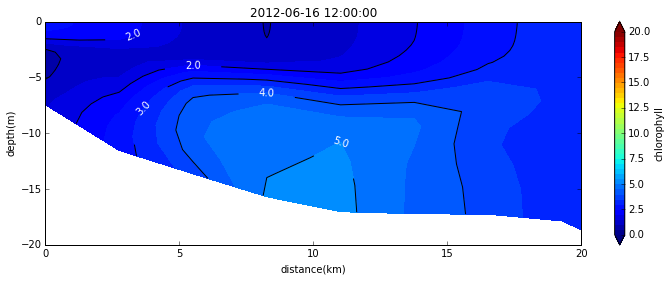

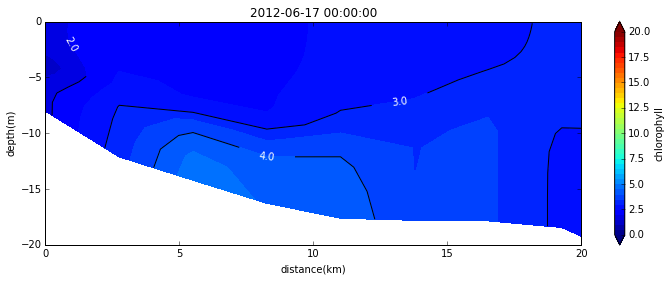

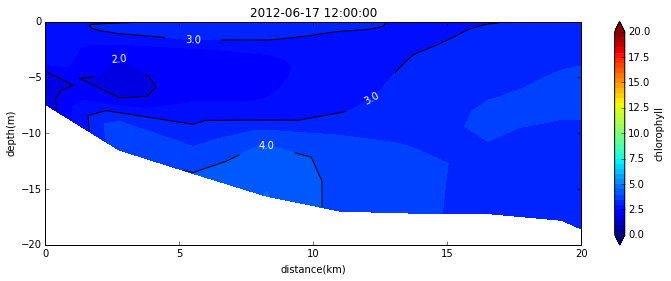

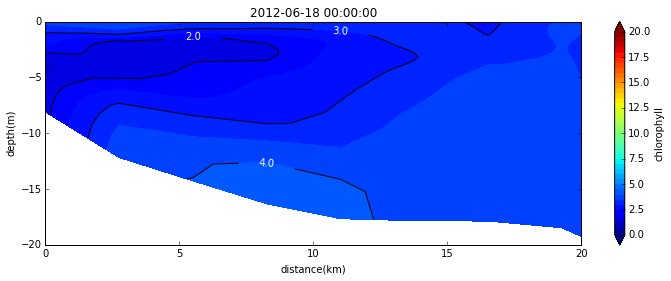

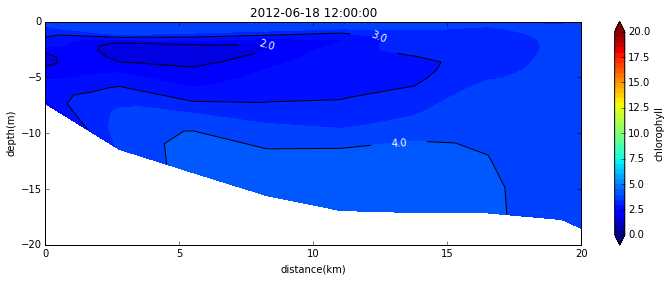

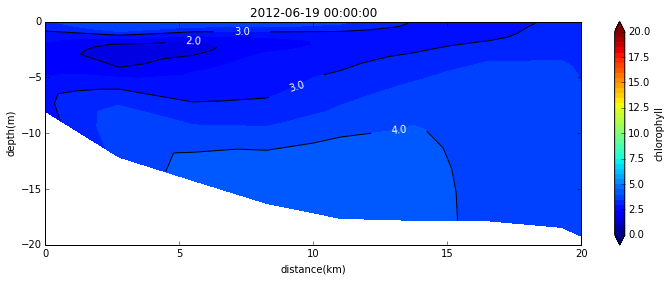

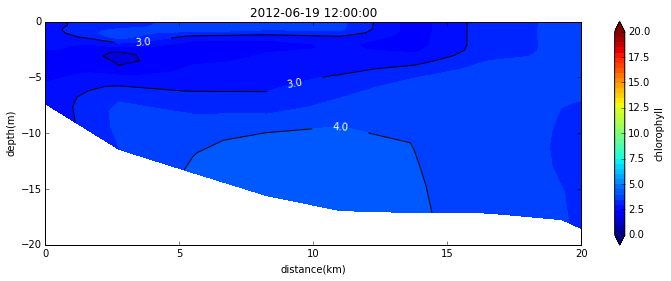

In [129]:
for t in range(7):
    vview(stafile, stations, 'chlorophyll', 335+t)


2012-01-01 00:00:00 0

2012-01-31 00:00:00 60

2012-03-01 00:00:00 120

2012-03-31 00:00:00 180

2012-04-30 00:00:00 240

2012-05-30 00:00:00 300


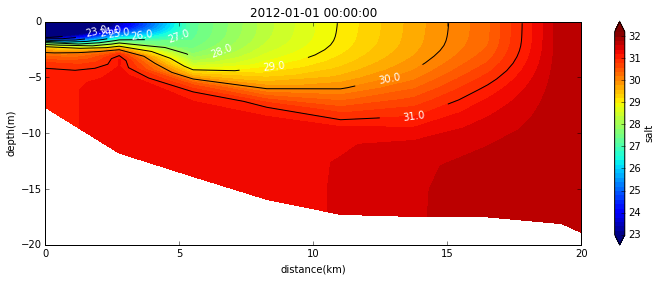

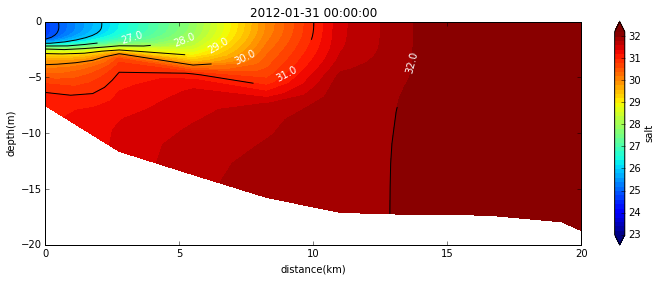

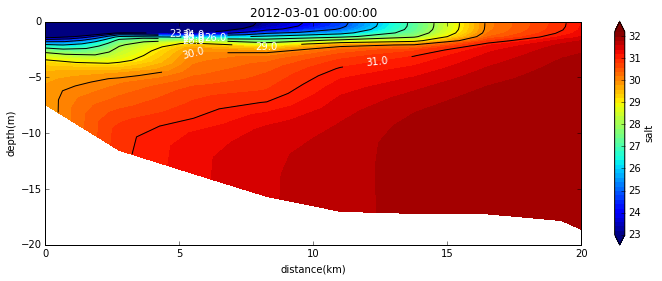

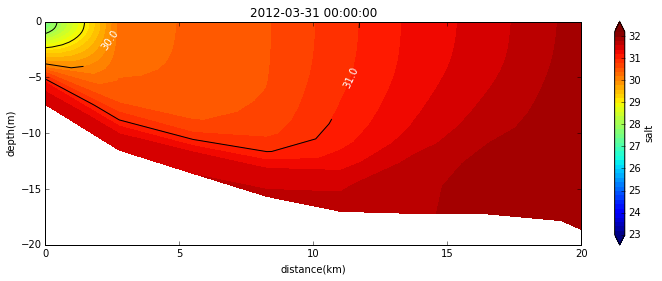

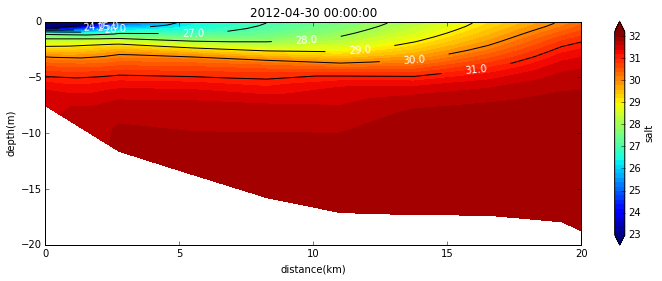

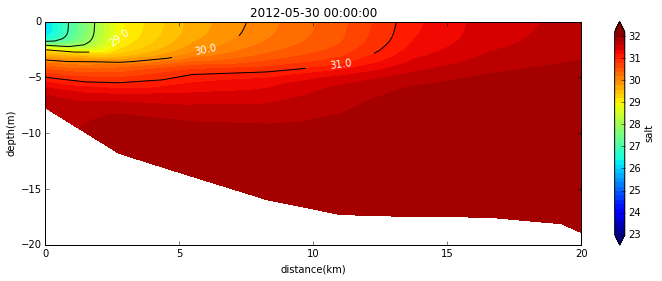

In [120]:
for time in [i*60 for i in range(6)]:
    vview(stafile, stations, 'salt', time)